![title](house_prices.jpg)

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data loading and cleaning

Pandas est une librairie standard de manipulation haut niveau de la donnée: https://pandas.pydata.org/docs/user_guide/index.html

## Data loading

In [2]:
df = pd.read_csv("house_sales_prices.csv")

In [3]:
# L'objet de base en pandas est le dataframe, un tableau bidimensionnel de données
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Retrait valeurs manquantes

In [5]:
df_with_dropped_na = df.dropna(axis=1)
assert(len(df_with_dropped_na.columns) == 62)

In [6]:
df_with_dropped_na.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Conserver seulement les colonnes numériques

In [7]:
df_with_dropped_na.dtypes.head(20)

Id               int64
MSSubClass       int64
MSZoning        object
LotArea          int64
Street          object
LotShape        object
LandContour     object
Utilities       object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
Condition2      object
BldgType        object
HouseStyle      object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle       object
dtype: object

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = df_with_dropped_na.select_dtypes(numerics)

In [9]:
df_numeric.dtypes

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

# Data visualization

seaborn est une librairie haut-niveau de visualisation de données, 
basée sur une librairie plus standard mais plus bas-niveau, matplotlib
https://seaborn.pydata.org/examples/index.html

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

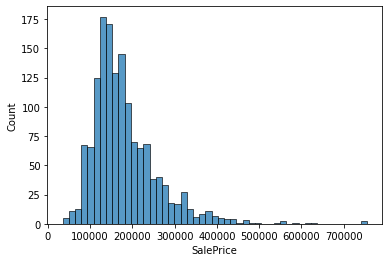

In [10]:
sns.histplot(df_numeric.SalePrice)

In [11]:
correlations = df_numeric.corr()
most_correlated_features = correlations["SalePrice"].sort_values(ascending=False)[:15]
most_correlated_features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
Name: SalePrice, dtype: float64

<AxesSubplot:>

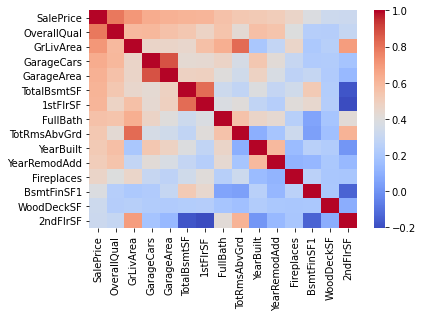

In [12]:
correlations_most_correlated_features = df_numeric[most_correlated_features.index].corr()
sns.heatmap(correlations_most_correlated_features, cmap="coolwarm")

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

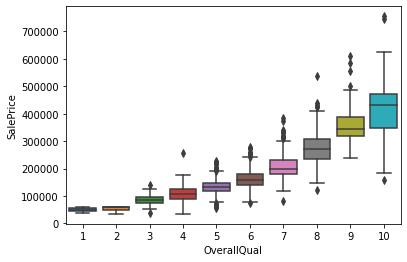

In [13]:
sns.boxplot(x=df_numeric.OverallQual, y=df_numeric.SalePrice)

# Premier modèle

## Cible (target) et variables explicatives (features)

x et y sont des notations standard en data science, représentant respectivement les données qui nous permettent de faire une prédiction (variables explicatives ou features en anglais) et la valeur qu'on cherche à prédire (cible ou target)

In [14]:
target = "SalePrice"
y = df_numeric[target]

In [15]:
x = df_numeric.drop(target, axis=1)
features = x.columns.tolist()
x.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,...,836,192,84,0,0,0,0,0,12,2008


## Séparation des données d'entraînement et de test

![title](training_test.png)

scikit-learn (importé en tant que sklearn) est la principale librairie permettant de faire du machine learning en python : https://scikit-learn.org/stable/user_guide.html

In [16]:
test_size_ratio = 0.2
random_state = 123 
# variable à utiliser pour pouvoir reproduir la même répartition sur plusiurs exécutions

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                   random_state=123)

In [17]:
x_train.shape, x_test.shape

((1168, 34), (292, 34))

## Entraînement du modèle

In [18]:
tree_model = DecisionTreeRegressor(max_depth=8)

In [19]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

## Prédictions sur l'ensemble d'apprentissage

In [20]:
predictions_train = tree_model.predict(x_train)
mean_absolute_error(predictions_train, y_train)

11607.950874365642

Le problème, c'est que la valeur d'erreur ci-dessus peut prendre des valeurs très différentes en fonction de la problématique. On préférera parfois utiliser des valeurs d'erreurs qui ont peuvent prendre des valeurs plus circonscrites, comme la fonction r2 utilisée ci-dessous.

![title](r2.png)

In [21]:
r2_score(predictions_train, y_train)

0.957875059066847

In [22]:
predictions_vs_realite_train = pd.DataFrame({"predictions sur ensemble d'entrainement": predictions_train,
                                             "valeurs ensemble d'entrainement": y_train})
predictions_vs_realite_train.head(15)

,predictions sur ensemble d'entrainement,valeurs ensemble d'entrainement
318,300500.000000,260000
580,156859.096774,181900
961,253352.857143,272000
78,139863.923077,136500
5,139361.320755,143000
793,232428.571429,225000
1425,152995.833333,142000
1392,106025.258065,123000
585,406116.095238,369900
876,143824.719101,132250


<AxesSubplot:xlabel="predictions sur ensemble d'entrainement", ylabel="valeurs ensemble d'entrainement">

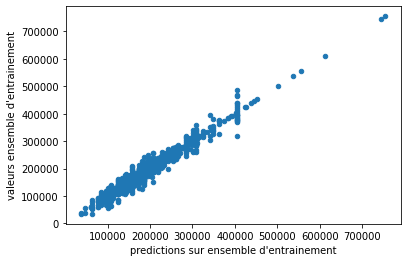

In [23]:
predictions_vs_realite_train.plot.scatter(x="predictions sur ensemble d'entrainement", y="valeurs ensemble d'entrainement")

## Predictions sur l'ensemble de test

In [24]:
predictions = tree_model.predict(x_test)
r2_score(predictions, y_test)

0.7095812822699732

<AxesSubplot:xlabel='predictions sur ensemble de test', ylabel='valeurs ensemble de test'>

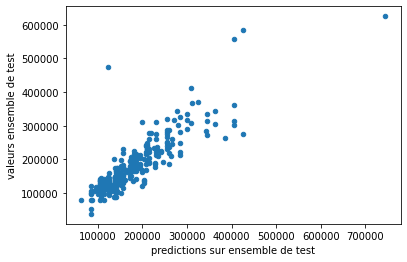

In [25]:
predictions_vs_realite = pd.DataFrame({"predictions sur ensemble de test": predictions,
                                       "valeurs ensemble de test": y_test})
predictions_vs_realite.plot.scatter(x="predictions sur ensemble de test", y="valeurs ensemble de test")

# Recherche des meilleurs paramètres

![titile](training_and_test.png)

In [26]:
# Création de l'ensemble de validation et d'un nouveau ensemble d'entraînement et 
# à partir de l'ancien ensemble d'entraînement
x_training, x_val, y_training, y_val = train_test_split(x_train, y_train)

In [27]:
hyperparameters_grid = {"max_depth": [None] + list(range(2, 12)), 
                        "min_samples_split": list(range(2, 20))}

# Créons la liste de toutes les combinaisons possibles d'hyperparamètres
hyperparameters_combinations_tuple_list = product(*(hyperparameters_grid[key] 
                                                    for key in hyperparameters_grid))
hyperparameters_combinations_dict_list = [{"max_depth": l[0], 
                                           "min_samples_split": l[1]} for l in
                                          hyperparameters_combinations_tuple_list]
hyperparameters_combinations_dict_list

[{'max_depth': None, 'min_samples_split': 2},
 {'max_depth': None, 'min_samples_split': 3},
 {'max_depth': None, 'min_samples_split': 4},
 {'max_depth': None, 'min_samples_split': 5},
 {'max_depth': None, 'min_samples_split': 6},
 {'max_depth': None, 'min_samples_split': 7},
 {'max_depth': None, 'min_samples_split': 8},
 {'max_depth': None, 'min_samples_split': 9},
 {'max_depth': None, 'min_samples_split': 10},
 {'max_depth': None, 'min_samples_split': 11},
 {'max_depth': None, 'min_samples_split': 12},
 {'max_depth': None, 'min_samples_split': 13},
 {'max_depth': None, 'min_samples_split': 14},
 {'max_depth': None, 'min_samples_split': 15},
 {'max_depth': None, 'min_samples_split': 16},
 {'max_depth': None, 'min_samples_split': 17},
 {'max_depth': None, 'min_samples_split': 18},
 {'max_depth': None, 'min_samples_split': 19},
 {'max_depth': 2, 'min_samples_split': 2},
 {'max_depth': 2, 'min_samples_split': 3},
 {'max_depth': 2, 'min_samples_split': 4},
 {'max_depth': 2, 'min_samples_sp

In [28]:
def get_score_with_a_decison_tree(hyperparameters):
    tree = DecisionTreeRegressor(**hyperparameters)
    tree.fit(x_training, y_training)
    predictions = tree.predict(x_val)
    score = r2_score(predictions, y_val)
    return score

In [29]:
# Pour chaque combinaison d'hyperparamètres, entraînons un arbre
# et calculons son score sur l'ensemble de validation
scores = [get_score_with_a_decison_tree(hyperparameter_combination) 
          for hyperparameter_combination in hyperparameters_combinations_dict_list]

In [30]:
max_score = max(scores)
print("Score du meilleur modèle sur l'ensemble où les hyperparamètres ont été optimisés: %s" % max_score)
best_score_index = scores.index(max_score)
best_hyperparameters = hyperparameters_combinations_dict_list[best_score_index]
best_tree = DecisionTreeRegressor(**best_hyperparameters).fit(x_train, y_train)
print("Score du meilleur modèle sur l'ensemble de test: %s" % best_tree.score(x_test, y_test))

print("Meilleurs hyperparamètres: %s" % best_hyperparameters)

Score du meilleur modèle sur l'ensemble où les hyperparamètres ont été optimisés: 0.49331394501544046
Score du meilleur modèle sur l'ensemble de test: 0.7556305092030289
Meilleurs hyperparamètres: {'max_depth': 9, 'min_samples_split': 5}


<AxesSubplot:xlabel='predictions sur ensemble de test', ylabel='valeurs ensemble de test'>

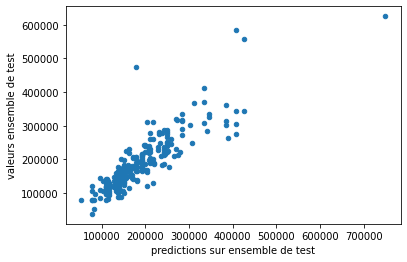

In [31]:
predictions_best_tree_vs_realite = pd.DataFrame({"predictions sur ensemble de test": best_tree.predict(x_test),
                                                 "valeurs ensemble de test": y_test})
predictions_best_tree_vs_realite.plot.scatter(x="predictions sur ensemble de test", y="valeurs ensemble de test")

# Validation croisée

![title](kfolds.jpg)

In [32]:
def get_cross_val_score(hyperparameters):
    scores = []
    x_train_matrix = x_train.values
    y_train_matrix = y_train.values
    # Créons six sous-ensembles (folds) de taille égale
    kfold = KFold(n_splits=6)
    # Et récupérons tous les ensembles d'entraînement et de validation possibles
    for train_indices, val_indices in kfold.split(x_train_matrix):
        x_train_k = x_train_matrix[train_indices, :]
        y_train_k = y_train_matrix[train_indices]
        x_val_k = x_train_matrix[val_indices, :]
        y_val_k = y_train_matrix[val_indices]
        # Pour chacun de ces sous-ensembles, entraînons un modèle et récupérons son score
        tree = DecisionTreeRegressor(**hyperparameters)
        tree.fit(x_train_k, y_train_k)
        predictions = tree.predict(x_val_k)
        score = r2_score(predictions, y_val_k)
        scores.append(score)
    # Renvoyons la moyenne des scores
    return np.mean(scores)

In [33]:
get_cross_val_score(best_hyperparameters)

0.6838777968804904

In [34]:
# Recalculons les scores de chacune des combinaisons de paramètres
cv_scores = [get_cross_val_score(hyperparameter_combination)
             for hyperparameter_combination in hyperparameters_combinations_dict_list]

In [35]:
max_score_cv = max(cv_scores)
print("Score du meilleur modèle sur l'ensemble de validation: %s" % max_score_cv)
best_score_index_cv = cv_scores.index(max_score_cv)
best_hyperparameters_cv = hyperparameters_combinations_dict_list[best_score_index_cv]
best_tree_cv = DecisionTreeRegressor(**best_hyperparameters_cv).fit(x_train, y_train)
print("Score du meilleur modèle sur l'ensemble de test: %s" % best_tree_cv.score(x_test, y_test))

print("Meilleurs paramètres: %s" % best_hyperparameters_cv)

Score du meilleur modèle sur l'ensemble de validation: 0.7403153766180303
Score du meilleur modèle sur l'ensemble de test: 0.7557871305959887
Meilleurs paramètres: {'max_depth': 11, 'min_samples_split': 14}


<AxesSubplot:xlabel='predictions sur ensemble de test', ylabel='valeurs ensemble de test'>

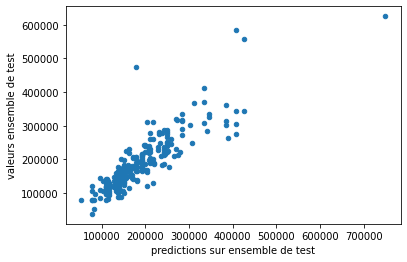

In [36]:
predictions_vs_realite_cv = pd.DataFrame({"predictions sur ensemble de test": best_tree.predict(x_test),
                                       "valeurs ensemble de test": y_test})
predictions_best_tree_vs_realite.plot.scatter(x="predictions sur ensemble de test", y="valeurs ensemble de test")

# Compromis biais variance

![title](bootstrap.png)

In [37]:
n_samples = 200
sample_size = 1000
pool_size = x_train.shape[0]

def get_bootstrap_sample(pool_size=pool_size, sample_size=sample_size):
    return np.random.choice(range(pool_size), size=sample_size, replace=True)

# Créons une liste d'indices d'échantillons "bootstrap" sur l'ensemble d'entraînement
samples = [get_bootstrap_sample() for _ in range(n_samples)]

In [38]:
def train_individual_tree(sample, max_depth=2):
    x_train_sample = x_train.values[sample, :]
    y_train_sample = y_train.values[sample]
    tree_sample = DecisionTreeRegressor(max_depth=max_depth)
    return tree_sample.fit(x_train_sample, y_train_sample)

mean_bias, mean_variance = [], []
scores_one_tree = []
max_depths = range(1, 25, 4)
# Pour différentes valeurs de profondeur possibles...
for depth in max_depths:
    # On va entraîner des arbres de décision, un par échantillon bootstrap
    tree_samples = [train_individual_tree(sample, depth) for sample in samples]
    predictions_tree_samples = [tree.predict(x_test) for tree in tree_samples]
    # On calcule les taux d'erreur de chacun des arbres...
    error_rates = np.concatenate([((x - y_test) / y_test).values.reshape(len(y_test), 1) 
                                for x in predictions_tree_samples],
                              axis=1)
    # Et on en déduit un taux d'erreur moyen, ou bias
    mean_bias.append(np.mean(np.abs(np.mean(error_rates, axis=1))))
    # et la variance des erreurs
    mean_variance.append(np.mean(np.std(error_rates, axis=1)))
    
    one_tree = DecisionTreeRegressor(max_depth=depth).fit(x_train, y_train)
    scores_one_tree.append(one_tree.score(x_test, y_test))

Text(0.5, 1.0, 'Évolution du biais en fonction de la profondeur des arbres')

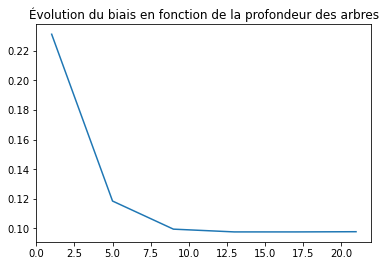

In [39]:
plt.plot(max_depths, mean_bias)
plt.title(u"Évolution du biais en fonction de la profondeur des arbres")

Text(0.5, 1.0, 'Évolution de la variance en fonction de la profondeur des arbres')

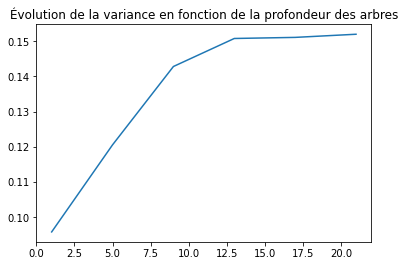

In [40]:
plt.plot(max_depths, mean_variance)
plt.title(u"Évolution de la variance en fonction de la profondeur des arbres")

Text(0.5, 1.0, "Évolution du score d'un seul arbre en fonction de la profondeur")

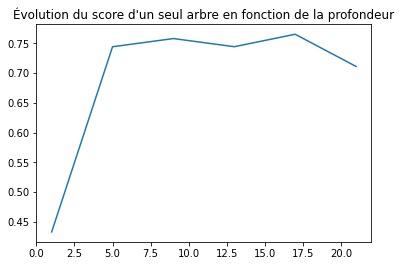

In [41]:
plt.plot(max_depths, scores_one_tree)
plt.title(u"Évolution du score d'un seul arbre en fonction de la profondeur")

![title](bias_variance.png)

# Aggrégation bootstrap (bagging)

In [42]:
score_bootstrap_aggregation_predictions = []
# Pour chaque profondeur possible...
for depth in max_depths:
    # On va maintenant prédire la moyenne des prédictions des arbres
    # entraînés sur les échantillons bootstrap
    tree_samples = [train_individual_tree(sample, depth) for sample in samples]
    predictions_tree_samples = [tree.predict(x_test) for tree in tree_samples]
    bootstrap_aggregation_predictions = sum(predictions_tree_samples) / n_samples
    score_bootstrap_aggregation_predictions.append(
        r2_score(y_test, bootstrap_aggregation_predictions))

Text(0.5, 1.0, "Évolution de l'erreur de l'aggrégation bootstrap en fonction de la profondeur")

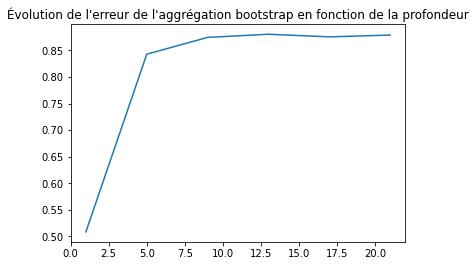

In [43]:
plt.plot(max_depths, score_bootstrap_aggregation_predictions)
plt.title(u"Évolution de l'erreur de l'aggrégation bootstrap en fonction de la profondeur")

<AxesSubplot:xlabel='predictions sur ensemble de test', ylabel='valeurs ensemble de test'>

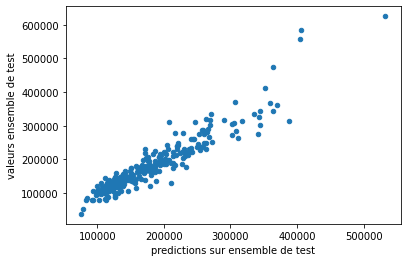

In [44]:
# Visualisons les prédictions pour des arbres de profondeur 10
tree_samples = [train_individual_tree(sample, 10) for sample in samples]
predictions_tree_samples = [tree.predict(x_test) for tree in tree_samples]
bootstrap_aggregation_predictions = sum(predictions_tree_samples) / n_samples

predictions_vs_realite_bootstrap_aggregation = pd.DataFrame({"predictions sur ensemble de test": bootstrap_aggregation_predictions,
                                       "valeurs ensemble de test": y_test})
predictions_vs_realite_bootstrap_aggregation.plot.scatter(x="predictions sur ensemble de test", y="valeurs ensemble de test")

## Forêt d'arbres aléatoires

![title](random_forest.png)

In [45]:
rf = RandomForestRegressor(max_depth=10, n_estimators=1000, n_jobs=-1)

In [46]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000, n_jobs=-1)

In [47]:
rf.score(x_test, y_test)

0.8798223015921017

# Boosting

![title](boosting_trees.png)

In [48]:
gbm = GradientBoostingRegressor(n_estimators=100, criterion="mse")
gbm.fit(x_train, y_train)

GradientBoostingRegressor(criterion='mse')

In [49]:
gbm.score(x_test, y_test)

0.897812667305006

<AxesSubplot:xlabel='predictions sur ensemble de test', ylabel='valeurs ensemble de test'>

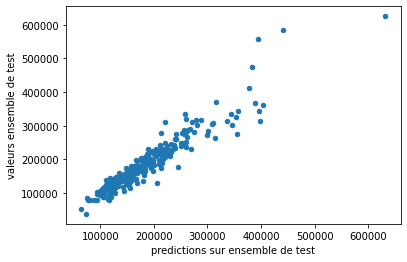

In [50]:
predictions_vs_realite_gbm = pd.DataFrame({"predictions sur ensemble de test": gbm.predict(x_test),
                                       "valeurs ensemble de test": y_test})
predictions_vs_realite_gbm.plot.scatter(x="predictions sur ensemble de test", y="valeurs ensemble de test")

# Feature engineering

## Dummificaton

TODO: Remplacer les colonnes contenant des variables catégorielles par des colonnes contenant des 0 et des 1, indicant si l'échangillon appartient ou non à la catégorie

In [51]:
df_dummified = pd.get_dummies(df)
df_dummified.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


### Vérifions l'impact

In [52]:
df_dummified_dropped_na = df_dummified.dropna()
y_dummified_dropped_na = df_dummified_dropped_na[target]
x_dummified_dropped_na = df_dummified_dropped_na.drop(target, axis=1)

In [53]:
x_train_dummified_dropped_na, x_test_dummified_dropped_na,\
y_train_dummified_dropped_na, y_test_dummified_dropped_na = \
            train_test_split(x_dummified_dropped_na, y_dummified_dropped_na, 
                             test_size=0.2, random_state=123)


In [54]:
gbm = GradientBoostingRegressor(n_estimators=100, criterion="mse")
gbm.fit(x_train_dummified_dropped_na, y_train_dummified_dropped_na)
gbm.score(x_test_dummified_dropped_na, y_test_dummified_dropped_na)

0.7960525092467731

Explication: comme on vien de rajouter beaucoup de nouvelles variables explicatives

## Imputation des valeurs manquantes

TODO: récupérer les données de départ, et remplacer les valeurs manquantes par la moyenne ou la médianne des valeurs de la colonne

In [55]:
y_dummified = df_dummified[target]
x_dummified = df_dummified.drop(target, axis=1)

In [56]:
x_train_dummified, x_test_dummified,\
y_train_dummified, y_test_dummified = train_test_split(x_dummified, y_dummified, test_size=0.2, 
                                                   random_state=123)


In [57]:
mean_imputer = SimpleImputer(strategy="mean")
x_train_no_na = mean_imputer.fit_transform(x_train_dummified)
x_test_no_na = mean_imputer.transform(x_test_dummified)

### Vérifions l'impact

In [58]:
gbm = GradientBoostingRegressor(n_estimators=100, criterion="mse")
gbm.fit(x_train_no_na, y_train_dummified)
gbm.score(x_test_no_na, y_test_dummified)

0.907240256468919